MODELS CREATIONS AND EVALUATION GIOVANNI MAGRONE COMPUTER SCIENCE 

IMPORTING LIBRARIES

In [2]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
#IMPORTING OS
import os
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt

Mounted at /content/drive


We will describe the dataset, the count rows as showed here, means that there are no missing values, so we reached the goal of having a complete dataset.

AS WE CAN SEE, WE HAVE A BALANCED DATASET

In [4]:
# IMPORTING THE PREPROCESSED DATASET
df = pd.read_csv('/content/drive/MyDrive/preprocessed_data.csv')
df.describe() #COMPUTING SOME STATISTICS
#df.isnull().any() Used to state if there are NaN values but we are sure due to preprocessing that we have clean dataset

stops       duration      days_left          price  \
count  300153.000000  300153.000000  300153.000000  300153.000000   
mean        0.924312      12.221021      26.004751   20889.660523   
std         0.398106       7.191997      13.561004   22697.767366   
min         0.000000       0.830000       1.000000    1105.000000   
25%         1.000000       6.830000      15.000000    4783.000000   
50%         1.000000      11.250000      26.000000    7425.000000   
75%         1.000000      16.170000      38.000000   42521.000000   
max         2.000000      49.830000      49.000000  123071.000000   

        AirLine_Code    Flight_Code  Source_City_Code  Departure_Time_Code  \
count  300153.000000  300153.000000     300153.000000        300153.000000   
mean        3.059356     801.622909          2.201487             1.835910   
std         1.459060     463.083569          1.684757             1.378931   
min         0.000000       0.000000          0.000000             0.000000   
25%         2.000000     481.000000          1.000000             1.000000   
50%         2.000000     826.000000          2.000000             2.000000   
75%         5.000000    1251.000000          4.000000             3.000000   
max         5.000000    1560.000000          5.000000             5.000000   

       Arrival_Time_Code  Destination_City_Code     Class_Code  
count      300153.000000          300153.000000  300153.000000  
mean            1.969939               2.420719       0.311464  
std             1.737428               1.783519       0.463093  
min             0.000000               0.000000       0.000000  
25%             0.000000               1.000000       0.000000  
50%             1.000000               2.000000       0.000000  
75%             4.000000               4.000000       1.000000  
max             5.000000               5.000000       1.000000

In [ ]:
display(df.info()) #Displaying of some information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   stops                  300153 non-null  int64  
 1   duration               300153 non-null  float64
 2   days_left              300153 non-null  int64  
 3   price                  300153 non-null  int64  
 4   AirLine_Code           300153 non-null  int64  
 5   Flight_Code            300153 non-null  int64  
 6   Source_City_Code       300153 non-null  int64  
 7   Departure_Time_Code    300153 non-null  int64  
 8   Arrival_Time_Code      300153 non-null  int64  
 9   Destination_City_Code  300153 non-null  int64  
 10  Class_Code             300153 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 25.2 MB


None

Now we are going to compute some analytics on the data, but before to do it, we are going to import the mapping with the pickle library

In [ ]:
import pickle

# Load the mappings from the file
with open("/content/drive/MyDrive/mappings.pkl", "rb") as file:
    mappings = pickle.load(file)

# Access the individual mapping dictionaries
airline_mapping = mappings["Airline"]
flight_mapping = mappings["Flight"]
source_city_mapping = mappings["Source_City"]
departure_time_mapping = mappings["Departure_Time"]
arrival_time_mapping = mappings["Arrival_Time"]
destination_city_mapping = mappings["Destination_City"]
class_mapping = mappings["Class"]

Now let's compute some analytics about the dataset

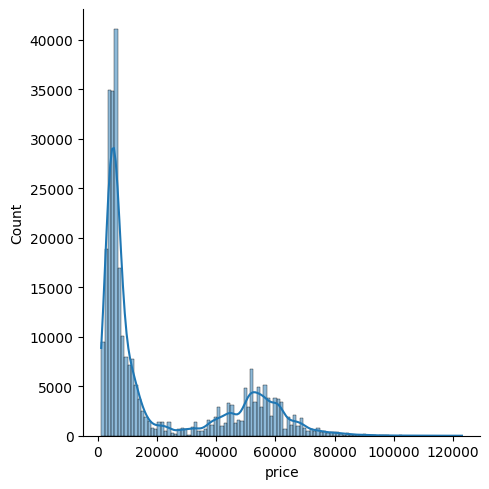

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.displot(data=df, x="price", kde=True)
#plt.xlim(10, 50) #Used to limit the dataset plot into a range 
# Showing the plot
plt.show()

As we can see, the most of the price for tickets is near to 10000$

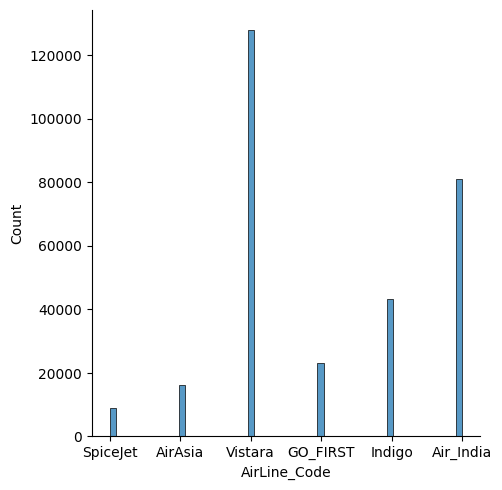

In [ ]:
# Determine the size of the existing mapping
size = len(airline_mapping)
airline_mapping_merged={}
# Add new values to the mapping in an iterative way
for i in range(0, size): #Creating the mapping for the plot
    airline_mapping_merged[i] = airline_mapping[i].format(i)
sns.displot(data=df, x="AirLine_Code")
plt.xticks(list(airline_mapping_merged.keys()), [v[1] for v in airline_mapping_merged.items()]) #Plotting the categorical values on the x axis
plt.show()

As we can see, the most taken company is the Vistara while the less one is SpiceJet

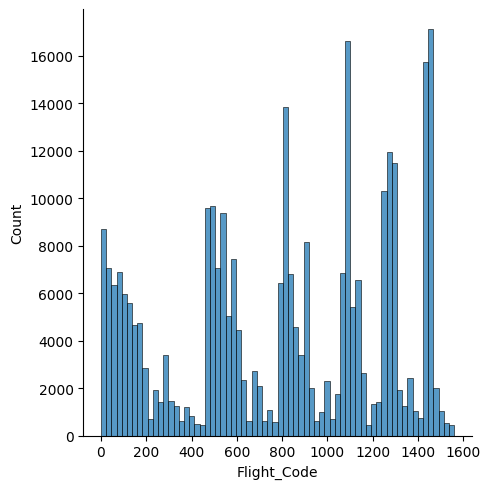

In [ ]:
sns.displot(data=df, x="Flight_Code")
# Showing the plot
plt.show()

As we can see there is an equal distribution in the Flight code, that for some range increases

In [ ]:
sns.displot(data=df, x="duration", kde=True)
# Showing the plot
plt.show()

Here the duration is expressed in Hours, and as we can see the most of flying has a duration in the range of 2/4 hours while as the more the time increases, the less is the number of flying having an increased duration.

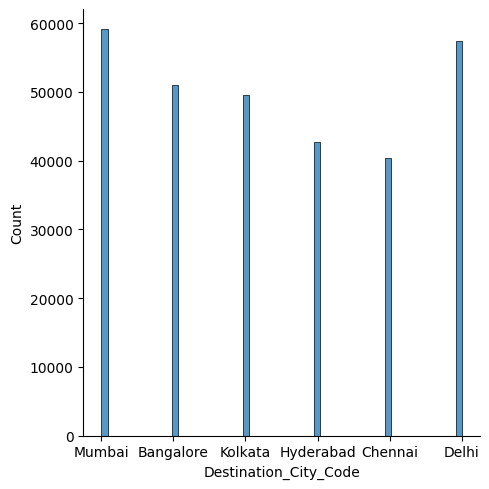

In [ ]:
# Determine the size of the existing mapping
size = len(destination_city_mapping)
destination_city_mapping_merged={}
# Add new values to the mapping in an iterative way
for i in range(0, size): #Creating the mapping for the plot
    destination_city_mapping_merged[i] = destination_city_mapping[i].format(i)
sns.displot(data=df, x="Destination_City_Code")
plt.xticks(list(destination_city_mapping_merged.keys()), [v[1] for v in destination_city_mapping_merged.items()]) #Plotting the categorical values on the x axis
plt.show()

As we can see the most of the flying were directed to Delhi while the less one to Chennai.



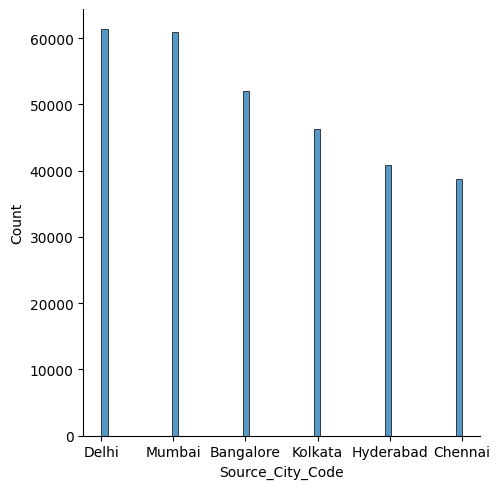

In [ ]:
# Determine the size of the existing mapping
size = len(source_city_mapping)
source_city_mapping_merged={}
# Add new values to the mapping in an iterative way
for i in range(0, size): #Creating the mapping for the plot
    source_city_mapping_merged[i] = source_city_mapping[i].format(i)
sns.displot(data=df, x="Source_City_Code")
plt.xticks(list(source_city_mapping_merged.keys()), [v[1] for v in source_city_mapping_merged.items()]) #Plotting the categorical values on the x axis
plt.show()

As we can see and as we can expect the most of flying starts from Delhi and the less one from Chennai

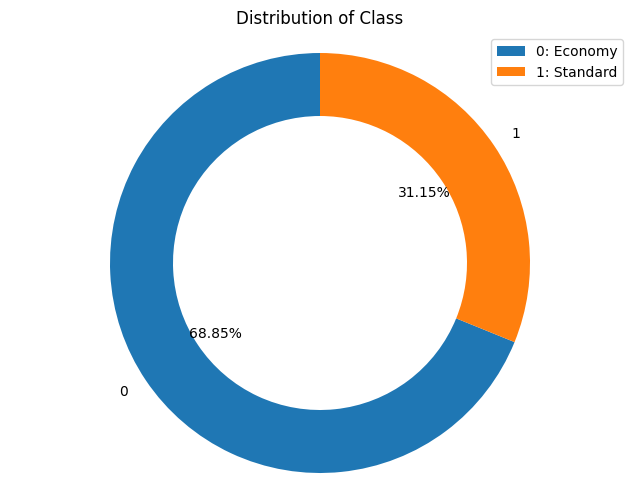

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# First plot as a cake diagram
plt.figure(figsize=(8, 6))
class_counts = df['Class_Code'].value_counts()
labels = class_counts.index.tolist()
sizes = class_counts.values.tolist()

plt.pie(sizes, labels=labels, autopct='%.2f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.gca().add_artist(plt.Circle((0, 0), 0.2, fc='white'))

# Adding the legend to state that 0 is economy and 1 is standard
legend_labels = ['0: Economy', '1: Standard']
plt.legend(legend_labels, loc='upper right')

plt.title('Distribution of Class')
plt.axis('equal')
plt.show()

Even here as we can expect, the most of flying are economy(less costly)

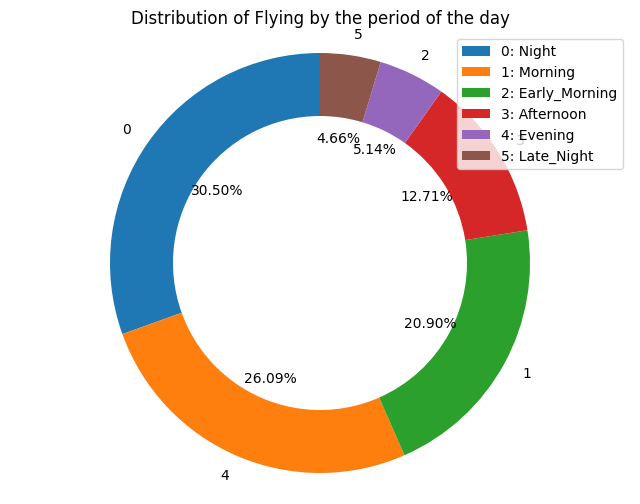

In [ ]:
# First plot as a cake diagram
plt.figure(figsize=(8, 6))
class_counts = df['Arrival_Time_Code'].value_counts()
labels = class_counts.index.tolist()
sizes = class_counts.values.tolist()

plt.pie(sizes, labels=labels, autopct='%.2f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.gca().add_artist(plt.Circle((0, 0), 0.2, fc='white'))

# Determine the size of the existing mapping
size = len(arrival_time_mapping)
legend_labels = []  # Create an empty list to store the legend labels

for i in range(0, size):
    legend_labels.append('{}: {}'.format(i, arrival_time_mapping[i]))

# Adding the legend to state that 0 is economy and 1 is standard
plt.legend(legend_labels, loc='upper right')

plt.title('Distribution of Flying by the period of the day')
plt.axis('equal')
plt.show()

As we can see, the arrival is during the night for the most, while the less one is during the late_night.

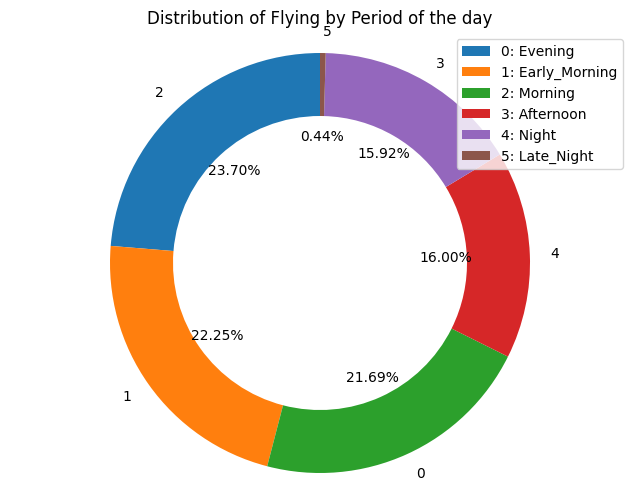

In [ ]:
# First plot as a cake diagram
plt.figure(figsize=(8, 6))
class_counts = df['Departure_Time_Code'].value_counts()
labels = class_counts.index.tolist()
sizes = class_counts.values.tolist()

plt.pie(sizes, labels=labels, autopct='%.2f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.gca().add_artist(plt.Circle((0, 0), 0.2, fc='white'))

# Determine the size of the existing mapping
size = len(departure_time_mapping)
legend_labels = []  # Create an empty list to store the legend labels

for i in range(0, size):
    legend_labels.append('{}: {}'.format(i, departure_time_mapping[i]))

# Adding the legend to state that 0 is economy and 1 is standard
plt.legend(legend_labels, loc='upper right')

plt.title('Distribution of Flying by Period of the day')
plt.axis('equal')
plt.show()

As we can notice here, the most flying goes in the evening and the less ones in the Late_night.

Now let's build the models, but before to do this, to improve the performance we are going to Scale the dataset with the MINMAXSCALER.

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Separate the input features from the target variable
X = df.drop('price', axis=1)
y = df['price']

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Normalize the input features
X_normalized = scaler.fit_transform(X)

# Convert the normalized features back to a DataFrame
normalized_data = pd.DataFrame(X_normalized, columns=X.columns)

# Print the normalized data
display(normalized_data.head(50))


stops  duration  days_left  AirLine_Code  Flight_Code  Source_City_Code  \
0     0.5  0.386122   0.812500           1.0     0.025641               0.0   
1     0.5  0.183673   0.854167           0.4     0.077564               0.6   
2     0.5  0.197347   0.833333           0.4     0.691667               0.6   
3     0.5  0.278980   0.270833           0.4     0.934615               1.0   
4     0.5  0.151429   0.395833           1.0     0.512821               0.4   
5     0.5  0.204082   0.083333           0.2     0.780769               0.6   
6     0.0  0.023878   0.125000           0.4     0.936538               1.0   
7     0.5  0.141224   0.937500           0.8     0.788462               0.6   
8     0.5  0.520408   0.895833           1.0     0.350641               0.2   
9     0.5  0.394694   0.020833           0.4     0.058333               0.0   
10    0.5  0.425306   0.854167           0.4     0.812179               0.8   
11    0.5  0.340204   0.458333           1.0     0.519872               0.4   
12    1.0  0.258571   0.500000           0.2     0.816667               1.0   
13    0.5  0.122449   0.375000           0.0     0.441026               0.2   
14    0.0  0.039184   0.520833           0.4     0.021154               0.0   
15    0.0  0.018776   0.958333           1.0     0.365385               0.2   
16    0.5  0.270408   0.520833           0.4     0.523077               0.4   
17    0.5  0.205918   0.333333           0.2     0.121154               0.4   
18    0.0  0.028980   0.666667           1.0     0.305128               0.2   
19    1.0  0.268776   0.895833           0.4     0.108333               0.0   
20    0.5  0.290816   0.791667           0.4     0.576282               0.4   
21    0.5  0.319796   0.395833           1.0     0.344872               0.2   
22    0.5  0.585102   0.687500           1.0     0.721795               0.6   
23    0.5  0.158163   1.000000           0.4     0.077564               0.6   
24    0.0  0.025510   0.291667           1.0     0.010256               0.0   
25    0.0  0.028980   0.791667           0.6     0.058974               0.0   
26    0.5  0.517143   0.520833           0.4     0.808333               0.8   
27    1.0  0.166735   0.979167           0.4     0.077564               0.6   
28    0.0  0.030612   0.062500           0.0     0.093590               0.0   
29    0.5  0.178571   0.166667           0.8     0.472436               0.4   
30    0.5  0.195714   0.312500           0.4     0.003846               0.0   
31    0.5  0.454082   0.270833           1.0     0.026282               0.0   
32    0.0  0.042653   0.125000           0.8     0.202564               0.0   
33    0.0  0.027347   0.229167           1.0     0.050641               0.0   
34    0.5  0.248367   0.395833           0.6     0.839744               0.8   
35    0.5  0.491633   0.979167           1.0     0.369231               0.2   
36    0.5  0.222857   0.479167           0.4     0.077564               0.6   
37    0.5  0.120816   0.250000           0.2     0.796795               0.8   
38    0.5  0.528980   0.625000           0.4     0.807051               0.8   
39    0.0  0.013673   0.708333           0.4     0.361538               0.2   
40    0.5  0.244898   0.437500           0.4     0.043590               0.0   
41    0.5  0.088571   0.354167           0.8     0.538462               0.4   
42    0.5  0.340204   0.083333           0.4     0.004487               0.0   
43    0.5  0.214286   0.625000           0.0     0.309615               0.2   
44    0.5  0.313061   0.479167           1.0     0.365385               0.2   
45    0.5  0.306122   0.187500           1.0     0.519872               0.4   
46    0.5  0.204082   0.416667           0.2     0.829487               0.8   
47    0.5  0.096939   0.687500           0.4     0.936538               1.0   
48    0.5  0.287551   0.229167           0.4     0.383974               0.2   
49    0.5  0.243265   0.354167           0.2     0.742

The first model we are going to see, is the DECISIONTREEREGRESSOR. Here we are also going to decide the splitting between the Training and the Testing sets

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import warnings

# Suppress the warning messages that takes into account future code deprecation
warnings.filterwarnings("ignore", category=FutureWarning)

# Split the data into input features (X) and target variable (y)
X = normalized_data
y = df['price']

# Split the data into training and testing sets(We will keep using this setting for training set all over the entire models evalutation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for random search
param_grid = {
    'max_depth': np.arange(1, 10),
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create an instance of the DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=42)

# Perform random search
random_search = RandomizedSearchCV(estimator=tree, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_tree = random_search.best_estimator_
best_params = random_search.best_params_

# Predict on the test set using the best model
y_pred = best_tree.predict(X_test)

# Calculate the mean squared error and coefficient of determination (R-squared)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate the correlation coefficient
corr_coef = np.corrcoef(y_test, y_pred)[0, 1]

# Calculate the relative squared error (RSE)
y_mean = np.mean(y_test)
rse = mse / (np.mean((y_test - y_mean) ** 2))

print("Best Hyperparameters:", best_params)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Correlation Coefficient:", corr_coef)
print("Relative Squared Error (RSE):", rse)


# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', round(mae, 3))


Best Hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 9}
Mean Squared Error: 22052780.613249447
R-squared: 0.9574674672235626
Correlation Coefficient: 0.978504419612256
Relative Squared Error (RSE): 0.0425325327764374
Mean Absolute Error (MAE): 2573.397


In [10]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df.merge(out,left_index=True,right_index=True)
result.sample(10)

stops  duration  days_left  price  AirLine_Code  Flight_Code  \
256467      1     26.58         16   6677             5          861   
147183      1     18.25          4  52586             5          891   
31231       1      8.33          7   6488             3         1076   
123094      1      7.67         47   3393             4         1040   
195631      2     15.00         33  64831             2         1100   
190142      1     10.42         14  10680             2            4   
156081      1     26.08         25   5862             5          868   
101524      1      8.42         19   4912             4         1068   
82680       0      1.08          4   4453             4         1362   
227428      1     10.67         19  75449             2          121   

        Source_City_Code  Departure_Time_Code  Arrival_Time_Code  \
256467                 2                    1                  1   
147183                 2                    5                  0   
31231                  3                    3                  0   
123094                 2                    1                  3   
195631                 3                    0                  1   
190142                 0                    2                  4   
156081                 2                    0                  0   
101524                 3                    4                  2   
82680                  4                    0                  0   
227428                 3                    2                  0   

        Destination_City_Code  Class_Code  Price_actual    Price_pred  
256467                      0           0          6677   6399.184492  
147183                      5           1         52586  52586.000000  
31231                       3           0          6488   9518.710562  
123094                      2           0          3393   4332.022634  
195631                      0           1         64831  59167.367540  
190142                      1           0         10680  11372.832309  
156081                      3           0          5862   5234.903023  
101524                      0           0          4912   5295.926061  
82680                       1           0          4453   4430.960000  
227428                      3           1         75449  60757.573054

In [11]:
import seaborn as sns
#Showing the differences between the actual value and the predicted value of the RandomForestRegressor model
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

Now we are going to try to solve this problem with a RANDOMFORESTREGRESSOR MODEL

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the random forest regressor
rf = RandomForestRegressor()

# Perform random search
random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=5)
random_search.fit(X_train, y_train)

# Get the best estimator
best_estimator = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_estimator.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate the correlation coefficient
corr_coef = np.corrcoef(y_test, y_pred)[0, 1]

# Calculate the relative squared error (RSE)
y_mean = np.mean(y_test)
rse = mse / (np.mean((y_test - y_mean) ** 2))

# Calculation of the best parameters of the model
print("Best Parameters:", random_search.best_params_)
# Calculation of the squared and R-squared
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Correlation Coefficient:", corr_coef)
print("Relative Squared Error (RSE):", rse)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', round(mae, 3))

Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': None}
Mean Squared Error: 6050084.537936666
R-squared: 0.9883313844443088
Correlation Coefficient: 0.9941492978207035
Relative Squared Error (RSE): 0.011668615555691224
Mean Absolute Error (MAE): 1012.187


In [14]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df.merge(out,left_index=True,right_index=True)
result.sample(10)

stops  duration  days_left  price  AirLine_Code  Flight_Code  \
30385       1     24.25         19  45257             5          179   
153788      1     16.00          2  16875             3           29   
141029      1     24.08         32  65832             2           90   
297978      1     15.00         13   6488             3         1131   
225336      1     13.00         37  55377             5         1447   
289642      1      9.17         23   4165             3         1307   
106012      1     18.08         17  60365             2          493   
45798       1     11.25          9   6489             4         1068   
53625       0      2.17          3  51496             2           24   
226490      1     15.42         26  64173             2          493   

        Source_City_Code  Departure_Time_Code  Arrival_Time_Code  \
30385                  0                    2                  1   
153788                 0                    1                  0   
141029                 0                    0                  4   
297978                 3                    4                  3   
225336                 5                    1                  4   
289642                 4                    3                  5   
106012                 1                    0                  3   
45798                  3                    4                  1   
53625                  0                    3                  4   
226490                 1                    0                  1   

        Destination_City_Code  Class_Code  Price_actual    Price_pred  
30385                       4           1         45257  45257.000000  
153788                      1           0         16875  12056.358643  
141029                      4           1         65832  65975.134025  
297978                      1           0          6488   7026.153656  
225336                      2           1         55377  55377.000000  
289642                      0           0          4165   4218.605658  
106012                      3           1         60365  60488.508353  
45798                       1           0          6489   6834.594896  
53625                       0           1         51496  40079.495218  
226490                      4           1         64173  65638.729396

In [15]:
#Showing the differences between the actual value and the predicted value of the Extra Tree Regressor model
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the random forest regressor
rf = ExtraTreesRegressor()

# Perform random search
random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=5)
random_search.fit(X_train, y_train)

# Get the best estimator
best_estimator = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_estimator.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate the correlation coefficient
corr_coef = np.corrcoef(y_test, y_pred)[0, 1]

# Calculate the relative squared error (RSE)
y_mean = np.mean(y_test)
rse = mse / (np.mean((y_test - y_mean) ** 2))


print("Best Parameters:", random_search.best_params_)
print('Mean Absolute Error (MAE):', round(mean_absolute_error(y_test, y_pred),3))
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Correlation Coefficient:", corr_coef)
print("Relative Squared Error (RSE):", rse)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}
Mean Absolute Error (MAE): 973.208
Mean Squared Error (MSE): 5875334.876340112
R-squared (R2): 0.9886684188455426
Correlation Coefficient: 0.9943185002974114
Relative Squared Error (RSE): 0.011331581154457428


Now we are going to analyze the results with ExtraTreesRegressor



In [ ]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df.merge(out,left_index=True,right_index=True)
result.sample(10)

stops  duration  days_left  price  AirLine_Code  Flight_Code  \
159408      0      1.83         49   2124             4          675   
48174       1     13.42         47   7004             5          809   
190249      0      1.75         40  20760             2          903   
236378      1     15.33         49   6461             2         1260   
210597      1      8.00         17   3873             4         1443   
21903       1      7.83         18   4111             2          819   
201237      1      5.75         38   2336             1          492   
86610       1     14.25         30  44144             2         1458   
287911      0      2.25         20   2410             1          184   
494         1     24.50         41   5348             2          487   

        Source_City_Code  Departure_Time_Code  Arrival_Time_Code  \
159408                 1                    1                  1   
48174                  2                    1                  4   
190249                 2                    4                  0   
236378                 4                    0                  1   
210597                 5                    3                  0   
21903                  2                    1                  3   
201237                 1                    2                  3   
86610                  5                    4                  1   
287911                 0                    0                  0   
494                    1                    0                  0   

        Destination_City_Code  Class_Code  Price_actual  Price_pred  
159408                      1           0          2124    2133.540  
48174                       2           0          7004    7401.995  
190249                      0           1         20760   20760.000  
236378                      1           0          6461    6461.000  
210597                      5           0          3873    4244.225  
21903                       5           0          4111    4198.135  
201237                      5           0          2336    2850.675  
86610                       1           1         44144   44144.000  
287911                      0           0          2410    2612.155  
494                         4           0          5348    4385.840

In [ ]:
import seaborn as sns

#Showing the differences between the actual value and the predicted value of the RandomForestRegressor model
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

Ridge regression is a variant of linear regression that incorporates L2 regularization to control overfitting.It adds a penalty term to the loss function that encourages the model to have smaller and more balanced coefficients.

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Ridge()
param_grid = {'alpha': [0.001, 0.05, 0.01, 0.1, 1.0, 10.0, 50.0, 100.0, 500.0, 1000.0]}  # Example grid, adjust as needed
search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
search.fit(X_train, y_train)
best_model = search.best_estimator_
best_params = search.best_params_  # Accessing the best parameters
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print('Mean Absolute Error (MAE):', round(mean_absolute_error(y_test, y_pred),3))
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

# Calculate the correlation coefficient
corr_coef = np.corrcoef(y_test, y_pred)[0, 1]

# Calculate the relative squared error (RSE)
y_mean = np.mean(y_test)
rse = mse / (np.mean((y_test - y_mean) ** 2))

print("Correlation Coefficient:", corr_coef)
print("Relative Squared Error (RSE):", rse)

print("Best Parameters:", best_params)  # Print out the best parameters
out = pd.DataFrame({'Price_actual': y_test, 'Price_pred': y_pred})
result = df.merge(out, left_index=True, right_index=True)
result.sample(10)


Mean Squared Error: 50166074.418435745
Mean Absolute Error (MAE): 4599.836
R-squared Score: 0.9033228675532843
Correlation Coefficient: 0.9504513365190621
Relative Squared Error (RSE): 0.09667713244671576
Best Parameters: {'alpha': 1.0}


stops  duration  days_left  price  AirLine_Code  Flight_Code  \
200141      1     11.50         14   7423             1          266   
105457      1      6.50         18   5955             4           25   
57976       1     17.00         40  47586             5         1282   
31175       1     12.92         20   4452             3         1345   
280820      1      5.83         26   4757             5          588   
168970      1     22.25         45  45257             5          148   
259679      2     23.92         44   6958             5           88   
120810      1      9.50         35   4674             2         1259   
257725      1     17.08         22  60978             2         1100   
219863      1      6.83         47   3153             4          859   

        Source_City_Code  Departure_Time_Code  Arrival_Time_Code  \
200141                 0                    1                  4   
105457                 0                    0                  0   
57976                  4                    1                  0   
31175                  4                    2                  0   
280820                 1                    2                  4   
168970                 0                    2                  2   
259679                 0                    2                  1   
120810                 4                    1                  4   
257725                 3                    0                  1   
219863                 2                    2                  4   

        Destination_City_Code  Class_Code  Price_actual    Price_pred  
200141                      1           0          7423  10207.818410  
105457                      2           0          5955   6888.162894  
57976                       5           1         47586  49528.436617  
31175                       0           0          4452   9036.428802  
280820                      4           0          4757   4259.783371  
168970                      4           1         45257  48644.232137  
259679                      4           0          6958   9239.399533  
120810                      4           0          4674   6504.476521  
257725                      1           1         60978  55217.580161  
219863                      0           0          3153   3696.911779

In [17]:
import seaborn as sns

#Showing the differences between the actual value and the predicted value of the ridge model
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

if tf.test.is_gpu_available():
    device_name = tf.test.gpu_device_name()
    print('GPU device:', device_name)
else:
    print('No GPU available, using CPU.')

X = tf.Variable(normalized_data)
y = tf.Variable(df['price'])

# Create the model within the GPU context
with tf.device('/GPU:0'):
    # Create the model
    model = Sequential()

    # Determine the number of input features
    n_features = X_train.shape[1]

    # Define the model architecture
    model.add(Dense(10, activation='relu', kernel_initializer='he_uniform', input_shape=(n_features,)))
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(400, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    # Train the model
    model.fit(X_train, y_train, epochs=200, batch_size=128)

# Evaluate the model
test_loss, test_mse = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', round(mae, 3))

# Calculate the correlation coefficient
corr_coef = np.corrcoef(y_test, y_pred.flatten())[0, 1]

# Calculate the relative squared error (RSE)
y_mean = np.mean(y_test)
rse = np.mean((y_test - y_pred.flatten()) ** 2) / np.mean((y_test - y_mean) ** 2)

print("Correlation Coefficient:", corr_coef)
print("Relative Squared Error (RSE):", rse)



GPU device: /device:GPU:0
Epoch 1/200
1876/1876 [==============================] - 10s 4ms/step - loss: 116508136.0000 - mean_squared_error: 116508136.0000
Epoch 2/200
1876/1876 [==============================] - 7s 4ms/step - loss: 34104520.0000 - mean_squared_error: 34104520.0000
Epoch 3/200
1876/1876 [==============================] - 7s 4ms/step - loss: 32748340.0000 - mean_squared_error: 32748340.0000
Epoch 4/200
1876/1876 [==============================] - 7s 4ms/step - loss: 31309792.0000 - mean_squared_error: 31309792.0000
Epoch 5/200
1876/1876 [==============================] - 7s 4ms/step - loss: 30183300.0000 - mean_squared_error: 30183300.0000
Epoch 6/200
1876/1876 [==============================] - 8s 4ms/step - loss: 29462716.0000 - mean_squared_error: 29462716.0000
Epoch 7/200
1876/1876 [==============================] - 6s 3ms/step - loss: 28923030.0000 - mean_squared_error: 28923030.0000
Epoch 8/200
1876/1876 [==============================] - 8s 4ms/step - loss: 28492

In [14]:

y_pred_series = pd.Series(y_pred.flatten(), index=y_test.index)

out = pd.DataFrame({'Price_actual': y_test, 'Price_pred': y_pred_series})
result = df.join(out, how='inner')

result.sample(20)



stops  duration  days_left  price  AirLine_Code  Flight_Code  \
35644       1      7.00         14   7954             4         1168   
220055      1     17.42         28  68303             2         1082   
247043      1     12.50         30   5461             5         1296   
226835      1     11.25         12  10018             2         1291   
148218      1      7.75         35  51819             2         1264   
173518      1      9.00          6  54115             2         1291   
223119      1      9.33         46   6395             3            9   
277395      1     14.00         14   7425             0           89   
11993       1      8.25         14  10733             1          817   
21616       1     17.50         16   2516             0         1398   
202803      0      2.75         10  32859             2           35   
134318      1     25.83         37   4247             5          576   
221038      1     13.83         26   4299             3         1005   
209488      1      5.58         45   4079             4         1513   
124339      2     15.50         26   8111             2         1108   
95268       1     12.75         47   6199             3          975   
80860       0      1.83          2  10353             4          697   
31252       1     12.50         16   3971             2          471   
181481      1     23.17         41  55983             5         1126   
30713       0      2.92         11   7489             1          812   

        Source_City_Code  Departure_Time_Code  Arrival_Time_Code  \
35644                  3                    2                  4   
220055                 3                    0                  1   
247043                 4                    1                  4   
226835                 4                    3                  5   
148218                 4                    2                  4   
173518                 4                    3                  0   
223119                 0                    3                  0   
277395                 0                    1                  0   
11993                  2                    1                  3   
21616                  5                    1                  0   
202803                 0                    2                  1   
134318                 1                    2                  1   
221038                 2                    4                  3   
209488                 5                    1                  1   
124339                 3                    1                  0   
95268                  2                    2                  0   
80860                  1                    0                  4   
31252                  1                    2                  0   
181481                 3                    3                  3   
30713                  2                    4                  5   

        Destination_City_Code  Class_Code  Price_actual    Price_pred  
35644                       5           0          7954   9279.961914  
220055                      5           1         68303  67017.312500  
247043                      4           0          5461   5039.746582  
226835                      5           0         10018  10999.392578  
148218                      2           1         51819  58225.894531  
173518                      5           1         54115  61137.632812  
223119                      2           0          6395   6228.094238  
277395                      4           0          7425   6270.166016  
11993                       5           0         10733   7255.334961  
21616                       5           0          2516   5923.060547  
202803                      1           1         32859  33883.703125  
134318                      2           0          4247   5131.935059  
221038                      0           0          4299   5702.012207  
209488                      2           0          4079   

In [15]:
import seaborn as sns
#Showing the differences between the actual value and the predicted value of the Fully Connected Neural Network model
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()